# Word embeddings & analysis of Poetry
* Digital humanities
* Gutenberg corpus includes preamble/non poetry. Could be filtered.
* Primarily English. 
* Data may further be cleaned by using lemmatization etc'. +- pretrained w2v models, multilingual. ([Example of loading a pretrained W2V model and finetuning it](https://www.kaggle.com/rtatman/fine-tuning-word2vec)

In [1]:
from gensim.utils import simple_preprocess
from gensim.sklearn_api.phrases import PhrasesTransformer # phrases/ coallocations - https://radimrehurek.com/gensim/sklearn_api/phrases.html
from gensim.sklearn_api import phrases
from gensim.models.phrases import Phrases #, ENGLISH_CONNECTOR_WORDS
from gensim.models import Word2Vec

# import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
interesting_words_list = ["salt","pepper","spice","spices","herbs","herbal","sweet","spicy","salty","moist",
                          "paprika","saffron","mace","lavender","honey","honeysuckle","chile","marjoram","sugar","tea","mint",
                          "taste","smell","aroma",
                          "cinnamon","cardamom","peppercorn","turmeric","anise","zaatar",
                          "fork","knife","dish","food","plate",
                         "basil","cilantro","chili","cumin","onion","garlic","dill","horseradish","radish","mustard","peppermint","pepper","sage","vanilla","wasabi"]

In [3]:
df = pd.read_csv("../input/gutenberg-poetry-dataset/Gutenberg-Poetry.csv",
#                  nrows=1234,
                 usecols=["s"]).drop_duplicates().rename(columns={"s":"text"})
df = df.loc[df["text"].str.split().str.len()>1]
df

,text
0,The Song of Hiawatha is based on the legends a...
1,"many North American Indian tribes, but especia..."
2,"Ojibway Indians of northern Michigan, Wisconsi..."
3,"They were collected by Henry Rowe Schoolcraft,..."
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z..."
...,...
3085095,Half-open on his father's smile.
3085100,"And his face the index be,"
3085101,Of his mother's chastity.'--Martin.
3085102,'Neque Alexandrina beluata conchyliata tapetia.'


In [4]:
## https://stackoverflow.com/questions/51049568/attributeerror-on-spacy-token-pos
## we could also lemmatize
# from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

df["text"] = df["text"].apply(lambda x: simple_preprocess(x, deacc=True, max_len=50,min_len=2))
# df.drop_duplicates("text",inplace=True)
print(df.shape)
# ## drop duplicates - on list
# df = df[~df["text"].apply(pd.Series).duplicated()]
# print(df.shape)

## phrases coallocation
m = PhrasesTransformer(min_count=6,max_vocab_size=30000000)
# df["text"] = m.fit_transform(df["text"].values)
m.fit(df["text"])
df["text"]  = m.transform(df["text"])


sentences = df["text"]

(2697916, 1)


In [5]:
df["text"].str.len().describe()

count    2.697916e+06
mean     6.890627e+00
std      2.011051e+00
min      0.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.700000e+01
Name: text, dtype: float64

In [6]:
#an example sentence in the data
print(sentences.iloc[7])

['who', 'was', 'chief', 'of', 'the', 'ojibway', 'tribe', 'at', 'la', 'pointe', 'wisconsin']


In [7]:
#Word2Vec
#training the gensim on the data
#Using the Cbow architecture for the word2Vec

model_cbow = Word2Vec(sentences, min_count = 2, size = 200, workers = 3, window = 6)

In [8]:
#Any example word vector
print('chief\n:',model_cbow['chief']) 

chief
: [ 0.96379983 -0.1231306  -0.14002964  0.54269105 -0.78721994  0.7550525
 -1.6810476   0.8017707  -1.6508431   0.26400393  0.7567431  -0.64965445
 -0.79843116 -0.6118362  -0.9965335   0.03152441  0.1943413   0.9784125
  0.4805851  -0.0883579   0.57520014 -0.21324179  0.21092853 -0.37916985
  0.34513527 -0.01034354 -0.79649496  0.23013882 -0.08471832 -0.26557153
 -0.10750677 -1.1682106  -0.0416569  -0.98611104 -0.8736763   0.41691917
  0.7437403  -0.50998574 -1.3740907   0.04200939 -0.8491864  -1.405679
  0.48101217  0.20511505  0.02055617  0.13027549  0.2231524  -0.7923796
 -0.5412332   1.5870281  -0.9850185   0.25695607  1.2776617   0.32767308
  0.55102825  0.10292484 -0.35893777  1.21908     0.8127749  -0.4442972
 -0.58644205 -0.5433625  -0.48021296 -1.6674974  -0.7581489  -0.30264437
 -0.50798845 -0.6986669  -0.9246651   1.5785006  -1.0684404   0.585536
  0.3481612  -2.3452988  -0.26267603 -0.07977389  0.11073483  1.4230707
  0.9523611   1.2800812  -0.5097474  -0.74161583 -0.

In [9]:
# Similarity of the words
print(model_cbow.similarity('chief', 'indian'))

0.17159563


#### Most similar words to a word
* CBOW model

In [10]:
print('the 10 most similar words to indian:\n')
model_cbow.most_similar('indian')

the 10 most similar words to indian:



[('italian', 0.6331292986869812),
 ('african', 0.6067647933959961),
 ('ethiop', 0.5983210802078247),
 ('eastern', 0.5799896121025085),
 ('tuscan', 0.5758532285690308),
 ('arabian', 0.5749711990356445),
 ('india', 0.574585497379303),
 ('irish', 0.5707169771194458),
 ('outland', 0.569949746131897),
 ('arcadian', 0.5696262717247009)]

In [11]:
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in model_cbow.most_similar(w, topn=13)])
    except: pass

salt 
 ['froth', 'milk', 'sugar', 'barley', 'boiling', 'cream', 'spice', 'honey', 'lees', 'foaming', 'muddy', 'oil', 'brackish']
pepper 
 ['beans', 'chocolate', 'jelly', 'porridge', 'flour', 'onions', 'champagne', 'ginger', 'biscuit', 'cream', 'currant', 'veal', 'potatoes']
spice 
 ['myrrh', 'spices', 'musk', 'thyme', 'luscious', 'frankincense', 'spicy', 'lemon', 'nard', 'aromatic', 'cream', 'honey', 'cassia']
spices 
 ['perfumes', 'spice', 'myrrh', 'frankincense', 'odors', 'nard', 'odours', 'juices', 'wines', 'spikenard', 'musk', 'unguents', 'scents']
herbs 
 ['fruits', 'plants', 'grapes', 'seeds', 'berries', 'spice', 'flowerets', 'myrrh', 'spices', 'shrubs', 'fruit', 'vines', 'crops']
herbal 
 ['snorin', 'rebellyon', 'jack_dandy', 'rosicrucian', 'avoy', 'pallidula', 'dydd', 'υδωρ', 'appetency', 'fonedd', 'diurna', 'abc', 'gwrtheb']
sweet 
 ['delicious', 'soft', 'sweetest', 'lovely', 'fragrant', 'bland', 'sweetly', 'pleasing', 'tender', 'sweeter_than', 'beautiful', 'gentle', 'dear']
s

In [12]:
# defining a tsne function to visualize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def plot_tsne(model, num):
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    tsne = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 1500, random_state = 23) # orig 2500 n_iter
    data = tsne.fit_transform(tokens[:num])
    x = []
    y = []
    for each in data:
        x.append(each[0])
        y.append(each[1])
    plt.figure(figsize = (13, 13))
    for i in range(num):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    plt.show()

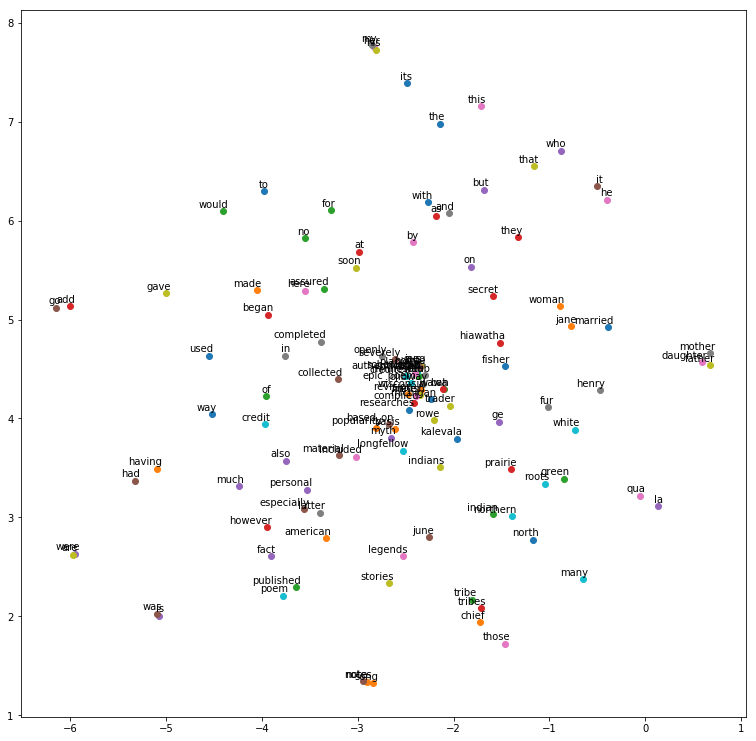

In [13]:
#visualising the cbow architecture(only the first 120)
plot_tsne(model_cbow, 120)

In [14]:
## let's see how the skipgram model works on the data
model_skipgram = Word2Vec(sentences, min_count = 2, size = 200, workers = 3, window = 6, sg = 1)

In [15]:
#Computing the similarities of the words
print(model_skipgram.similarity('indian', 'chief'))

0.33570775


#### skipgram - most similar words

In [16]:
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in model_skipgram.most_similar(w, topn=13)])
    except: pass

salt 
 ['yeast', 'brackish', 'salt_sea', 'salty', 'froth', 'whey', 'sponge', 'salt_water', 'amrit', 'pepper', 'curds', 'scurf', 'crusts']
pepper 
 ['biscuit', 'pounded', 'veal', 'ginger', 'biscuits', 'porridge', 'chocolate', 'pork', 'soda', 'onions', 'molasses', 'pastry', 'candy']
spice 
 ['spices', 'spicy', 'cinnamon', 'honeycomb', 'musk', 'attar', 'garlic', 'curds', 'thyme', 'honey_dew', 'lemon', 'cassia', 'spikenard']
spices 
 ['spice', 'frankincense', 'spikenard', 'curds', 'honeycomb', 'myrrh', 'spicy', 'perfumes', 'cinnamon', 'sandal_wood', 'nard', 'fragrant_herbs', 'odours']
herbs 
 ['simples', 'fruits', 'cates', 'balsam', 'plants', 'balms', 'crops', 'flours', 'culling', 'flowres', 'shrubs', 'fragrant_herbs', 'savour']
herbal 
 ['bankside', 'piastre', 'leddie', 'mairi', 'sheenest', 'loyd', 'ighly', 'toity', 'menseless', 'reflectively', 'indecently', 'chicke', 'sedateness']
sweet 
 ['mellifluous', 'sweetness', 'soft', 'maidenhood', 'delicious', 'sweeter_than', 'ravishing', 'sweete

In [17]:
print('the 10 most similar words to indian:\n')
model_skipgram.most_similar('indian')

the 10 most similar words to indian:



[('arabian', 0.6733106374740601),
 ('ethiop', 0.650467038154602),
 ('phoenician', 0.6456162929534912),
 ('outland', 0.6448777914047241),
 ('asian', 0.6409698724746704),
 ('sabine', 0.6367394924163818),
 ('sicilian', 0.6353272199630737),
 ('aethiop', 0.6310896873474121),
 ('african', 0.6292663216590881),
 ('australian', 0.6284325122833252)]

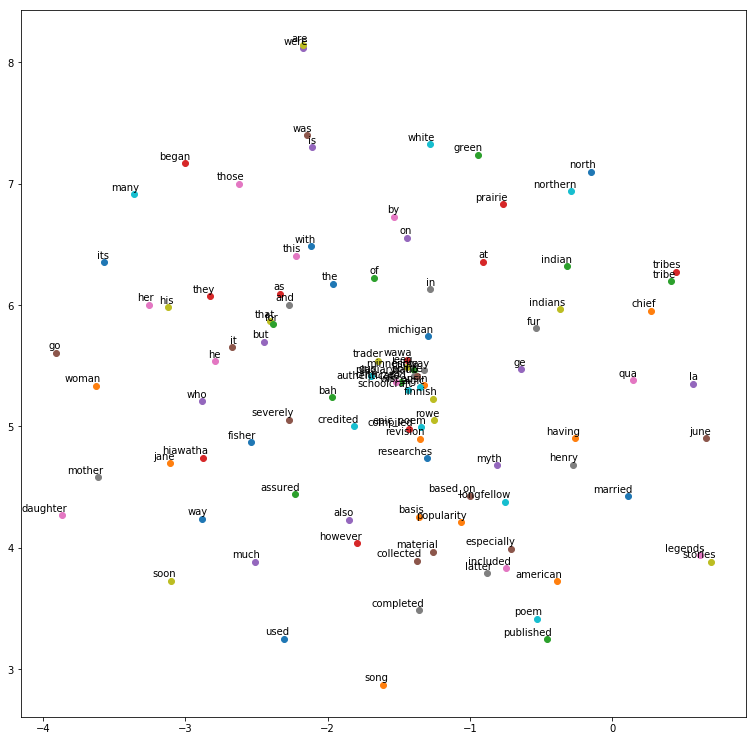

In [18]:
#visualising the skipgram archtecture(only the first 100)
plot_tsne(model_skipgram,100)

### glove based model/embeddings

In [19]:
#using the glove package for embeddings
!pip install glove_python

     |████████████████████████████████| 266kB 586kB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=745397 sha256=31a5da8b9a5224a07b7f819477a37327e488f5d0d75ba8a28843add87b093a52
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [20]:
from glove import Corpus, Glove
corpus = Corpus()
corpus.fit(sentences, window = 5)
glove = Glove(no_components = 150, learning_rate = 0.05)
glove.fit(corpus.matrix, epochs = 30, no_threads = 4, verbose = False)
glove.add_dictionary(corpus.dictionary)

In [21]:
#Computing the similarities of the words
print(glove.most_similar('indian', number = 9))

[('elfin', 0.7751680903793047), ('italian', 0.7625914526532847), ('isle', 0.7318559304093323), ('english', 0.7257067476337709), ('elf', 0.717036214002173), ('antique', 0.7168622090869999), ('german', 0.7164284633830964), ('eastern', 0.7148740952157102)]


In [22]:
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in glove.most_similar(w, number=13)])
    except: pass

salt 
 ['foaming', 'driddlety', 'sand', 'moss', 'shells', 'moaning', 'brine', 'titwillow', 'silk', 'oil', 'ice', 'wave']
pepper 
 ['bramble', 'steaming', 'vases', 'furze', 'seaweed', 'sedge', 'whiskey', 'hoops', 'exhalations', 'chips', 'squalor', 'beryl']
spice 
 ['lime', 'amethyst', 'oil', 'balsam', 'fern', 'lard', 'musk', 'sugar', 'pork', 'grime', 'rhythm', 'brandy']
spices 
 ['musk', 'merriment', 'forks', 'richness', 'filth', 'odors', 'fluent', 'odours', 'moisture', 'manifold', 'discontent', 'gaiety']
herbs 
 ['fruits', 'weeds', 'vines', 'sweets', 'grapes', 'scents', 'divers', 'poisonous', 'horrors', 'seeds', 'plants', 'groves']
herbal 
 ['fairyest', 'friendless_', 'dredfulleste', 'hierarchate', 'sesine', 'trisira', 'showrie', 'condyloid', 'revolutionists', 'skinnes', 'carbonized', 'wyny']
sweet 
 ['unpityingly', 'pottingen', 'gueneveres', 'music', 'tender', 'perfume', 'smilia', 'soft', 'honey', 'sweetest', 'melody', 'smell']
spicy 
 ['sunniest', 'cooling', 'odorous', 'healthful', '

In [23]:
# now visualising first 80 words using tsne
def plot_tsne_glove(model, num):
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(glove.word_vectors[glove.dictionary[word]])
        labels.append(word)
    tsne = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 1500, random_state = 23) # was n_iter 2500 originally
    data = tsne.fit_transform(tokens[:num])
    x = []
    y = []
    for each in data:
        x.append(each[0])
        y.append(each[1])
    plt.figure(figsize = (12, 12))
    for i in range(num):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    plt.title('Word vectorization using Glove')
    plt.show()

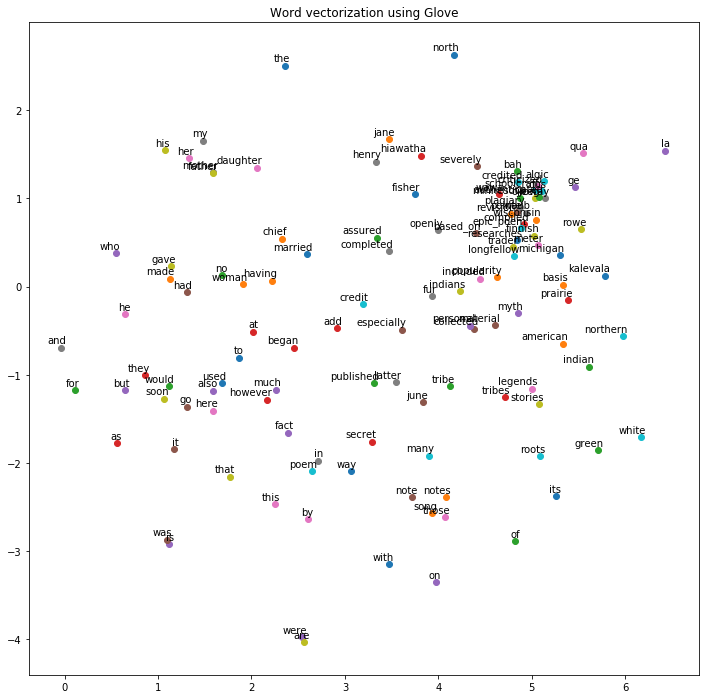

In [24]:
plot_tsne_glove(model_skipgram, 120)

#### Finetuning a pretrained model
* Example : https://www.kaggle.com/rtatman/fine-tuning-word2vec
* We will use conceptnet numberbatch embeddings - can be downloaded manually, via [Gensim's downloader api](https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html), or imported from one of the kaggle datasets (as done here)
    * https://www.kaggle.com/joeskimo/conceptnet
    * https://www.kaggle.com/blackitten13/gensim-embeddings-dataset
    * Example numberbatch loading + "cleaning" code snippets: https://gist.github.com/ixaxaar/9fc209e7ba1c88b87f287028396609f1

In [25]:
import gensim
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

In [26]:
## load pretrained conceptnet numberatch + Clean it's format ("remove "/c/en" and similar prefixes of language?)
## takes ~ 2 minutes to load
model = KeyedVectors.load_word2vec_format("../input/conceptnet/numberbatch-en-19.08.txt",binary=False, unicode_errors='ignore',limit=800000)

In [27]:
model.most_similar('indian')

[('kutcha_house', 0.9975984692573547),
 ('indianize', 0.9409624934196472),
 ('postindian', 0.8943952322006226),
 ('indianise', 0.8910172581672668),
 ('indianisation', 0.8681048154830933),
 ('asian_indian', 0.8636947870254517),
 ('indish', 0.8623092770576477),
 ('mahratta', 0.8451744914054871),
 ('indians', 0.8327249884605408),
 ('indoasian', 0.8291921615600586)]

In [28]:
print("Pretrained model, without finetuning on poetry:")
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in model.most_similar(w, topn=10)])
    except: pass

Pretrained model, without finetuning on poetry:
salt 
 ['sodium_carboxymethyl_cellulose', 'water_in_ocean', 'dibasic_salt', 'fluoroboride', 'salteth', 'resalt', 'calcium_stearate', 'sprinkle_salt_on', 'unsalinated', 'oversalt']
pepper 
 ['white_pepper', 'piper_nigrum', 'pepperlike', 'black_pepper', 'lolot', 'peppering', 'bepepper', 'adding_flavor', 'sweet_pepper', 'bell_pepper']
spice 
 ['spicen', 'spicelike', 'five_spice_powder', 'thai_food', 'spicing', 'spices', 'spiceful', 'spiceless', 'bespice', 'spicery']
spices 
 ['spice', 'spicen', 'flavor_food', 'spiceful', 'five_spice_powder', 'spicery', 'spicelike', 'thai_food', 'zhug', 'spicing']
herbs 
 ['peppermint_geranium', 'herb', 'drypis', 'fragrant_grass', 'herbless', 'large_flowered_fiddleneck', 'stone_parsley', 'herbous', "sand_devil's_claw", 'clammyweed']
herbal 
 ['ethnoherbal', 'herbal_medicine', 'nevada_ephedra', 'drypis', 'herbarian', 'herbist', 'gray_ephedra', 'stone_parsley', 'sarsasapogenin', 'medicinal']
sweet 
 ['sweetling

In [29]:
model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentences)
total_examples = model_2.corpus_count
model_2.build_vocab([list(model.vocab.keys())], update=True)

model_2.intersect_word2vec_format("../input/conceptnet/numberbatch-en-19.08.txt",binary=False, unicode_errors='ignore')
model_2.train(sentences, total_examples=total_examples, epochs=model_2.iter)

(92951665, 92951665)

In [30]:
print("Finetuned model on poetry:")
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in model_2.most_similar(w, topn=13)])
    except: pass

Finetuned model on poetry:
salt 
 ['salteth', 'fluoroboride', 'resalt', 'dibasic_salt', 'water_in_ocean', 'sodium_carboxymethyl_cellulose', 'calcium_stearate', 'sprinkle_salt_on', 'unsalinated', 'oversalt', 'table_salt', 'melt_ice', 'sodium_hydrogen_phosphate']
pepper 
 ['white_pepper', 'piper_nigrum', 'pepperlike', 'black_pepper', 'lolot', 'peppering', 'bepepper', 'adding_flavor', 'sweet_pepper', 'bell_pepper', 'fresh_chile', 'green_pepper', 'globe_pepper']
spice 
 ['spicen', 'spicelike', 'five_spice_powder', 'thai_food', 'spicing', 'spices', 'spiceful', 'spiceless', 'bespice', 'spicery', 'bepepper', 'baharat', 'garam_masala']
spices 
 ['spice', 'spicen', 'flavor_food', 'spiceful', 'five_spice_powder', 'spicery', 'spicelike', 'thai_food', 'zhug', 'spicing', 'garam_masala', 'seasonings', 'chicken_salt']
herbs 
 ['peppermint_geranium', 'herb', 'drypis', 'fragrant_grass', 'herbless', 'large_flowered_fiddleneck', 'stone_parsley', 'herbous', 'scopolia_carniolica', 'clammyweed', 'martynia',

In [31]:
# model.train(sentences, total_examples=total_examples, epochs=model_2.iter)
### AttributeError: 'Word2VecKeyedVectors' object has no attribute 'train' 
# print("Pretrained model, without finetuning on poetry:")
# for w in interesting_words_list:
#     try: print(w,"\n",[i[0] for i in model.most_similar(w, topn=12)])
#     except: pass